상관계수 0.889:


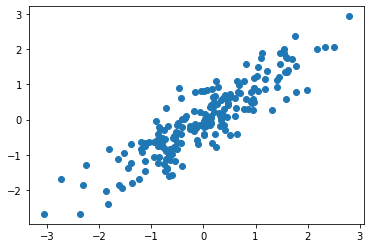

In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
sample = np.random.RandomState(1)

%precision 3
X = np.dot(sample.rand(2,2), sample.randn(2, 200)).T
X

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

print('상관계수 {:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [17]:
print('주성분의 고유벡터) : {}'.format(pca.components_))
print('각 주성분의 분산 : {}'.format(pca.explained_variance_))
print('각 주성분의 분산비 : {}'.format(pca.explained_variance_ratio_))

주성분의 고유벡터) : [[-0.707 -0.707]
 [-0.707  0.707]]
각 주성분의 분산 : [1.899 0.111]
각 주성분의 분산비 : [0.945 0.055]


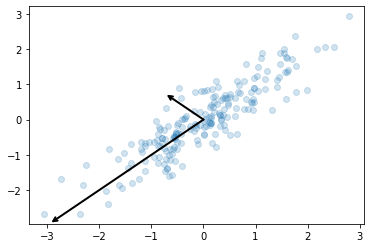

In [24]:
arrowprops = dict(arrowstyle='->',
                               linewidth=2,
                               shrinkA=0, shrinkB=0)

def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X_std[:,0], X_std[:,1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

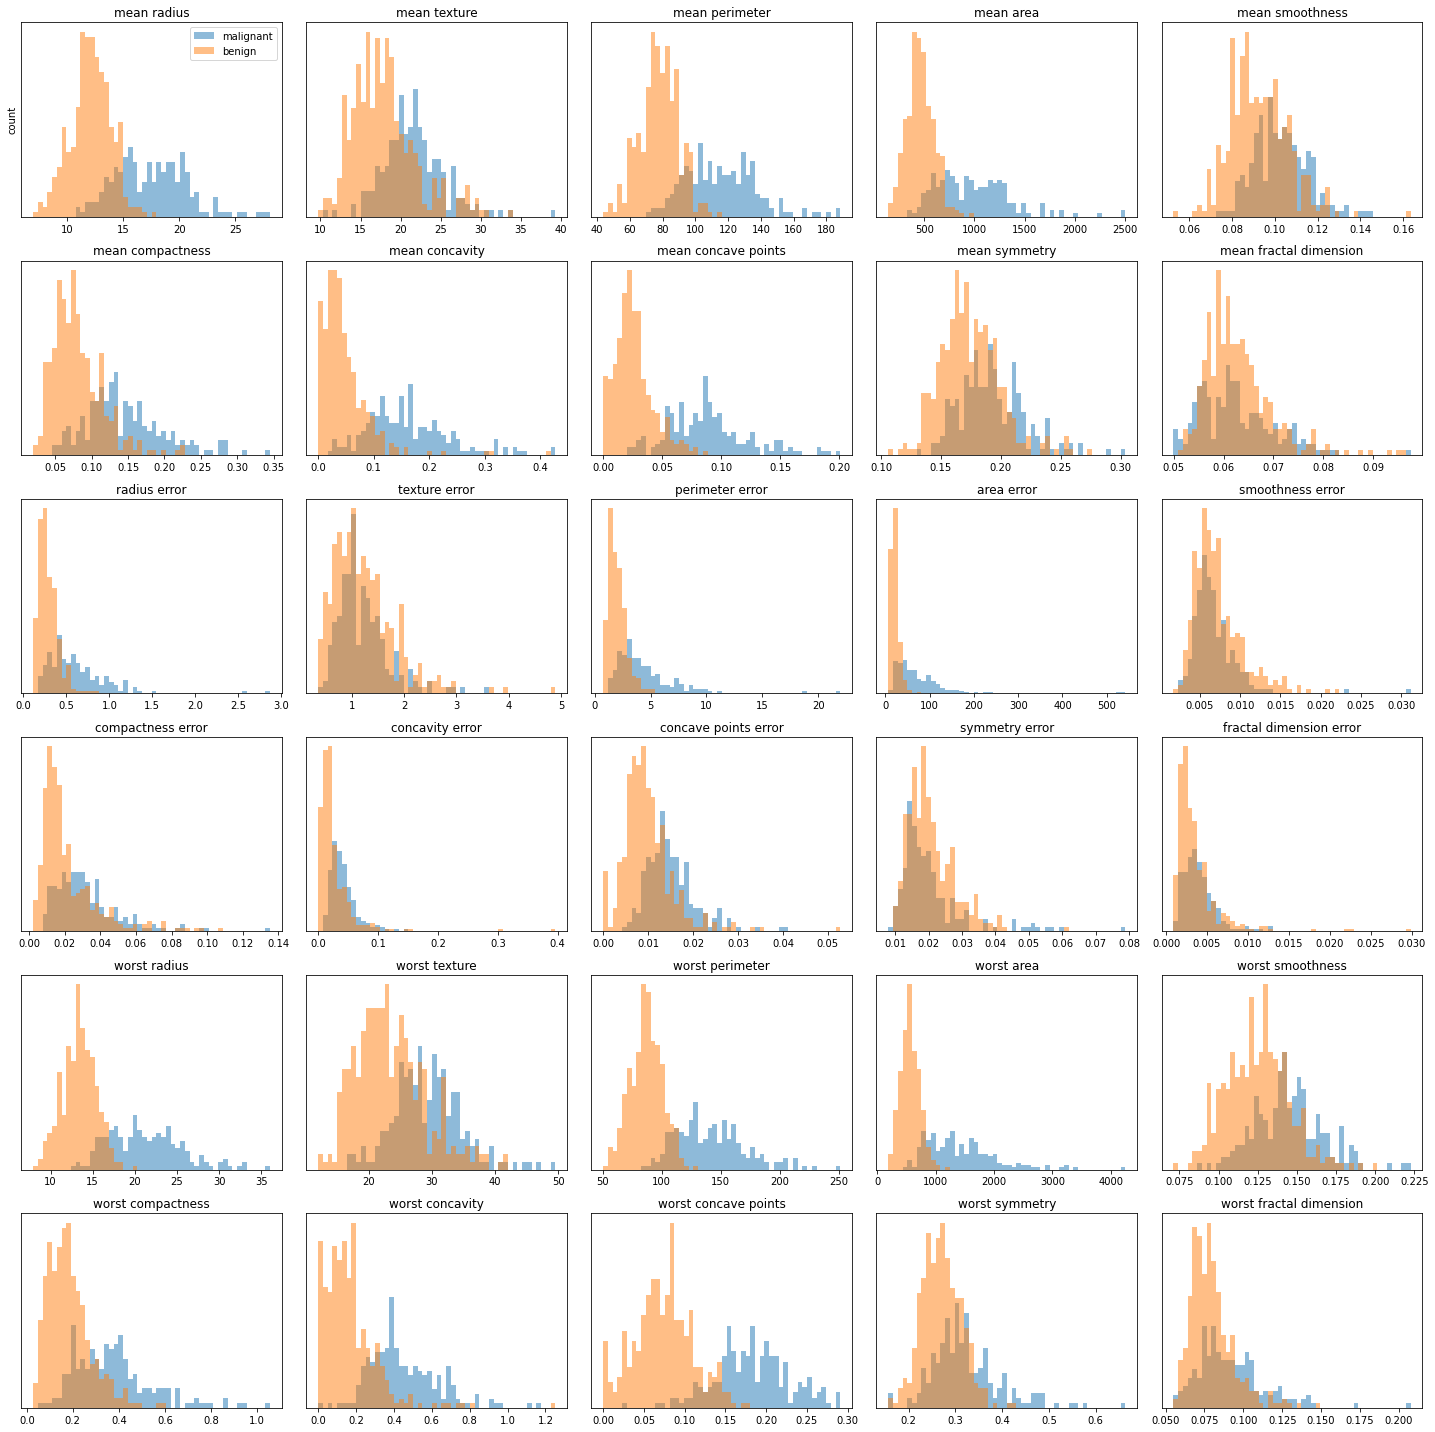

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

malignant = cancer.data[cancer.target==0]

benign = cancer.data[cancer.target==1]

fig, axes= plt.subplots(6,5, figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_ylabel('count')
ax[0].legend(['malignant', 'benign'],loc='best')
fig.tight_layout()

In [34]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)Busan_Data

pca = PCA(n_components=5)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape : {}'.format(X_pca.shape))
print('Explained variance ratio : {}'.format(pca.explained_variance_ratio_))

X_pca shape : (569, 5)
Explained variance ratio : [0.443 0.19  0.094 0.066 0.055]


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

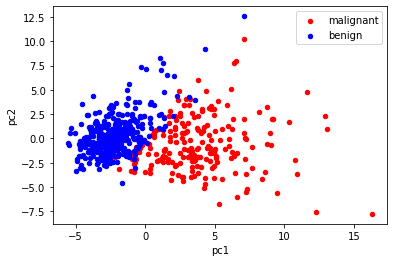

In [44]:
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2','pc3','pc4','pc5'])
X_pca
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]

ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')

pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)
                                     

In [45]:
X_pca

,pc1,pc2,pc3,pc4,pc5,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,0
...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510722,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0


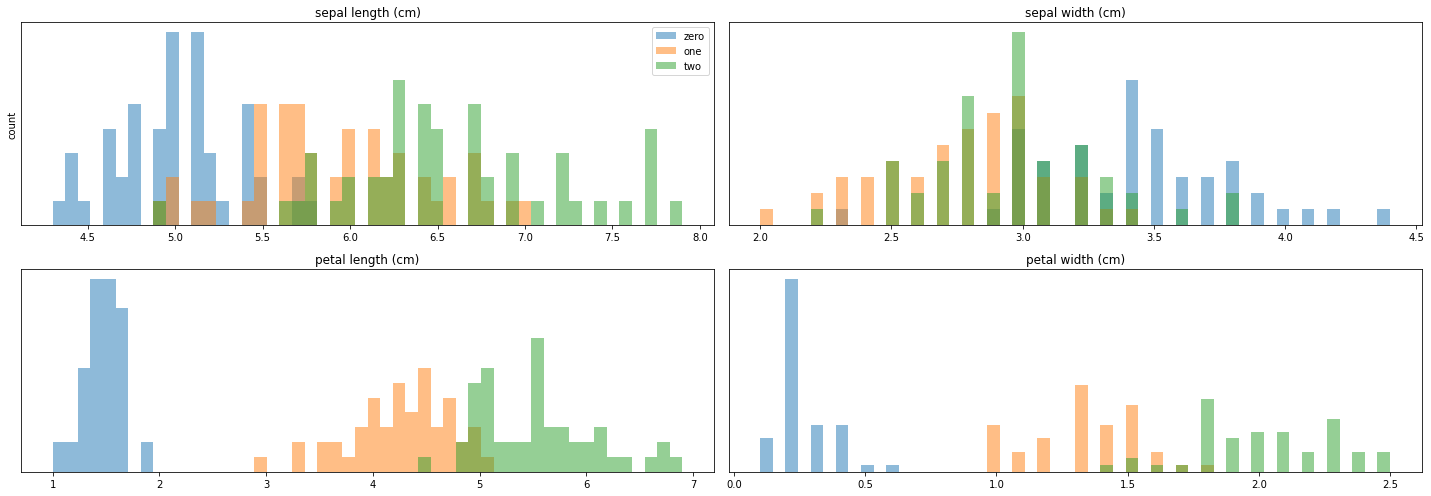

In [82]:
from sklearn.datasets import load_iris

iris = load_iris()
zero = iris.data[iris.target==0]
one = iris.data[iris.target==1]
two = iris.data[iris.target==2]

fig, axes = plt.subplots(2,2,figsize=(20,7))
ax = axes.ravel()

for i in range(4):
    _,bins = np.histogram(iris.data[:,i], bins=50)
    ax[i].hist(zero[:,i], bins, alpha=.5)
    ax[i].hist(one[:,i], bins, alpha=.5)
    ax[i].hist(two[:,i], bins, alpha=.5)
    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_ylabel('count')
ax[0].legend(['zero','one','two'],loc='best')
fig.tight_layout()

In [69]:
iris_std = sc.fit_transform(iris.data)

pca = PCA(n_components=4)
pca.fit(iris_std)
iris_pca = pca.transform(iris_std)

print('iris_pca shape : {}'.format(iris_pca.shape))
print('Explained variance ratio : {}'.format(pca.explained_variance_ratio_))

iris_pca shape : (150, 2)
Explained variance ratio : [0.73  0.229]


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

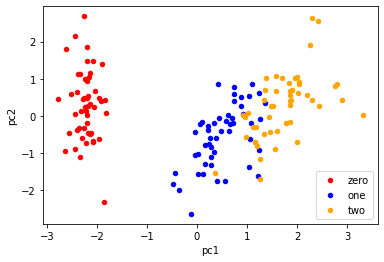

In [81]:
iris_pca = pd.DataFrame(iris_pca, columns=['pc1','pc2','pc3','pc4'])
iris_pca = pd.concat([iris_pca, pd.DataFrame(iris.target, columns=['target'])], axis=1)

pca_zero = iris_pca[iris_pca['target'] == 0]
pca_one = iris_pca[iris_pca['target'] == 1]
pca_two = iris_pca[iris_pca['target'] == 2]
ax = pca_zero.plot.scatter(x='pc1', y='pc2', color='red', label='zero')
pca_one.plot.scatter(x='pc1', y='pc2', color='blue', label='one', ax=ax)
pca_two.plot.scatter(x='pc1', y='pc2', color='orange', label='two', ax=ax)